In [2]:
import numpy as np
from tokenizer import encoder
import matplotlib.pyplot as plt
from collections import Counter
import tiktoken

def get_corpus_from_file(file):
    data = np.load(f'data/model_data/{file}')
    corpus = data['tabs']
    return [t for t in corpus.flatten() if t != 0]

def get_freq(corpus):
    token_counts = {}
    for token in corpus:
        token_counts[token] = token_counts.get(token, 0) + 1
    return token_counts

def viz_token_distribution(corpus):
    freq_counts = get_freq(corpus)
    sorted_counts = sorted([(v, k) for k, v in freq_counts.items()], reverse=True)
    print(sorted_counts)

    plt.figure(figsize=(10, 5))
    plt.bar([str(k) for _, k in sorted_counts], [v for v, _ in sorted_counts])
    plt.xticks(rotation=90)
    plt.show()

# corpus = get_corpus_from_file('test_data_solo.npz')
# viz_token_distribution(corpus)




In [3]:
# count occurences of pairs
def get_stats(c):
    stats = {}
    for pair in zip(c[:-1], c[1:]):
        stats[pair] = stats.get(pair, 0) + 1
    return stats

def merge(old_corpus, pair, idx):
    new_corpus = []
    i = 0
    while i < len(old_corpus):
        if i < len(old_corpus) - 1 and (old_corpus[i], old_corpus[i+1]) == pair:
            new_corpus.append(idx)
            i += 2
        else:
            new_corpus.append(old_corpus[i])
            i += 1
    return new_corpus

def get_entropy(corpus):
    freqs = get_freq(corpus)
    dist = [f/len(corpus) for f in freqs.values()]
    return -sum(p * np.log2(p) for p in dist)

def get_perplexity(corpus):
    freqs = get_freq(corpus)
    N = len(corpus)
    log_probs = [np.log2(freqs[token] / N) for token in corpus]
    return 2 ** (-np.mean(log_probs))

def train(corpus, num_merges):
    merges = {}
    next_idx = max(corpus) + 1
    for _ in range(num_merges):
        stats = get_stats(corpus)
        top_pair = max(stats, key=stats.get)
        merges[top_pair] = next_idx
        corpus = merge(corpus, top_pair, next_idx)
        next_idx += 1
    return corpus, merges

def apply_merges(corpus, merges):
    for pair, idx in merges.items():
        corpus = merge(corpus, pair, idx)
    return corpus

def validate(corpus, best_perplexity, patience_counter):
    entropy = get_entropy(corpus)
    perplexity = get_perplexity(corpus)
    print(f'entropy={entropy:.4f}, perplexity={perplexity:.4f}')
    if perplexity < best_perplexity:
        patience_counter = 0
        best_perplexity = perplexity
        print("Improvement detected, patience reset")
    else:
        patience_counter += 1
        print(f'No improvement, patience_counter={patience_counter}')
    return entropy, perplexity, patience_counter, best_perplexity

merge_epochs = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
train_corpus = get_corpus_from_file('audio_tabs_batch_1.npz')
val_corpus = get_corpus_from_file('audio_tabs_batch_1.npz')

best_perplexity = float('inf')
patience_counter = 0
patience = 3
merge_epochs = [128]

for num_merges in merge_epochs:
    corpus_iter = train_corpus.copy()
    val_corpus_iter = val_corpus.copy()

    corpus_iter, merges = train(corpus_iter, num_merges)

    val_corpus_iter = apply_merges(val_corpus_iter, merges) 
    entropy, perplexity, patience_counter, best_perplexity = validate(
        val_corpus_iter, best_perplexity, patience_counter
    )

    if patience_counter >= patience:
        print("Early stopping triggered")
        viz_token_distribution(corpus_iter)
        viz_token_distribution(val_corpus_iter)
        break
    print()



FileNotFoundError: [Errno 2] No such file or directory: 'data/model_data/audio_tabs_batch_1.npz'

[(24879, 134), (24879, 133), (7286, 112), (5873, 68), (4868, 95), (3887, 90), (3838, 117), (3716, 70), (3639, 73), (3636, 48), (3539, 92), (3125, 46), (2915, 24), (2892, 115), (2855, 2), (2697, 75), (2653, 94), (2622, 72), (2604, 114), (2546, 97), (2451, 93), (2417, 50), (2352, 27), (2180, 53), (2078, 74), (1753, 96), (1666, 71), (1528, 52), (1355, 116), (1345, 113), (1340, 4), (1328, 76), (1116, 77), (994, 49), (956, 55), (949, 51), (929, 119), (924, 118), (915, 9), (892, 99), (875, 98), (850, 26), (801, 29), (758, 31), (684, 136), (684, 135), (659, 54), (642, 25), (591, 5), (586, 32), (510, 33), (508, 47), (440, 91), (432, 7), (396, 28), (358, 10), (353, 11), (295, 100), (279, 12), (262, 69), (258, 6), (253, 120), (240, 34), (236, 79), (223, 30), (191, 101), (161, 3), (159, 80), (148, 57), (146, 58), (141, 78), (135, 56), (88, 102), (83, 36), (78, 121), (68, 83), (67, 124), (65, 104), (63, 105), (61, 63), (52, 14), (49, 62), (46, 13), (45, 60), (44, 16), (39, 122), (35, 8), (31, 82),

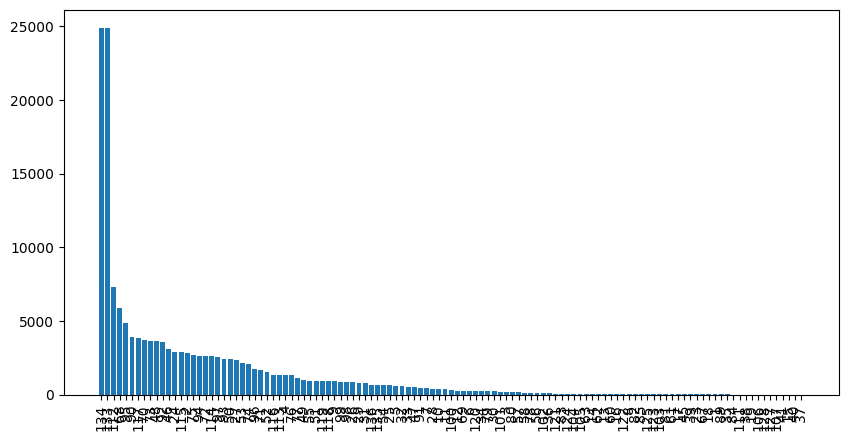

[(3071, 137), (1673, 134), (1459, 133), (1447, 68), (1210, 70), (1166, 24), (1154, 95), (1085, 75), (1037, 46), (965, 90), (939, 72), (929, 2), (903, 74), (865, 94), (858, 71), (836, 144), (821, 93), (801, 29), (780, 112), (754, 73), (728, 115), (728, 77), (696, 51), (691, 48), (688, 92), (642, 97), (639, 53), (632, 76), (629, 154), (617, 52), (601, 50), (595, 145), (591, 5), (586, 32), (576, 26), (568, 114), (568, 55), (524, 138), (508, 47), (495, 9), (491, 151), (490, 186), (486, 164), (484, 31), (468, 49), (463, 98), (454, 118), (439, 161), (432, 195), (432, 7), (412, 198), (410, 117), (402, 199), (396, 28), (396, 27), (395, 201), (393, 113), (386, 4), (385, 119), (382, 143), (373, 96), (371, 169), (361, 139), (358, 10), (353, 11), (352, 209), (350, 54), (346, 184), (345, 210), (345, 166), (341, 148), (330, 178), (327, 153), (320, 220), (312, 222), (309, 152), (307, 225), (298, 226), (295, 100), (281, 159), (280, 171), (279, 229), (279, 12), (276, 230), (276, 179), (274, 232), (274,

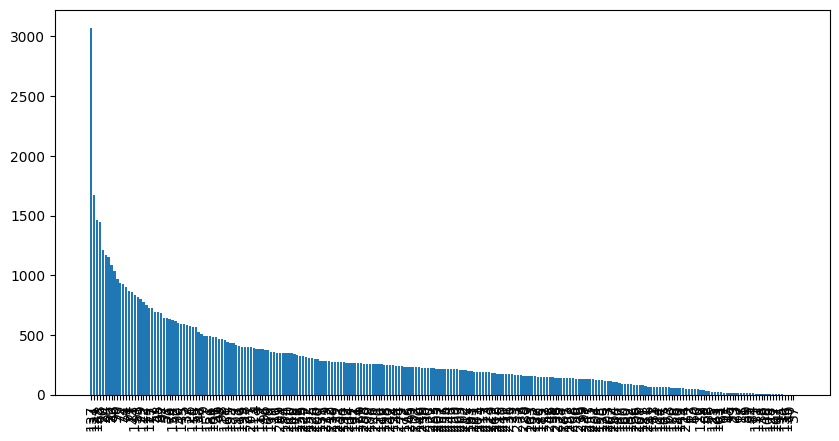

In [ ]:
viz_token_distribution(train_corpus)
viz_token_distribution(corpus_iter)

In [ ]:
enc = encoder()
print(enc.decode([134, 133]))

</C><C>


In [ ]:
enc.encode('<H>')

[135]

In [4]:
import os
import re
# corpus = get_corpus_from_file('audio_tabs_batch_9.npz')

# loop through each file in model_data
for file in os.listdir('data/model_data'):
    if not file.endswith('.npz'):
        continue
    data = np.load(f'data/model_data/{file}')
    for segment in data['tabs']:
        for i, t in enumerate(segment):
            if t == 135:
                try:
                    prev = enc.decode([segment[i-1]]) 
                    prev_string = int(re.search(r"S(\d+)", prev).group(1))
                    prev_fret = int(re.search(r"F(\d+)", prev).group(1))

                    post = enc.decode([segment[i+1]])
                    post_string = int(re.search(r"S(\d+)", post).group(1))
                    post_fret = int(re.search(r"F(\d+)", post).group(1))
                except:
                    print("Error")
                    print(enc.decode(segment[max([i-1, 0]):i+2]))
                    print("-"*20)
                if prev_string != post_string:
                    print(enc.decode(segment[i-1:i+2]))
                    print("post string", post_string)
                    print("prev string", prev_string)
                if prev_fret > post_fret:
                    print()
                    print(enc.decode(segment[i-1:i+2]))
                    print("post fret", post_fret)
                    print("prev fret", prev_fret)
                    print()
                    print("-"*20)
                    print()


FileNotFoundError: [Errno 2] No such file or directory: 'data/model_data/audio_tabs_batch_9.npz'

# Count occurences of chords

In [ ]:
corpus = get_corpus_from_file('audio_tabs_batch_29.npz')
chord = []

i = 0
all_chords = []

while i < len(corpus):
    if corpus[i] == 133: # <c>
        chord = []
        i += 1
        while i < len(corpus) and corpus[i] != 134: # </c
            chord.append(corpus[i])
            i += 1
        all_chords.append(sorted(chord))  # sort to treat same chord as same key
        if i < len(corpus) and corpus[i] == 134:
            i += 1  # skip the end marker
    else:
        i += 1

print(len(all_chords)) 

def plot_chord_distribution(chord_counts, top_n=30):
    """
    Plots the frequency distribution of the top N most common chords.
    
    Parameters:
    - chord_counts: collections.Counter where keys are chord tuples and values are counts
    - top_n: number of most frequent chords to plot
    """
    most_common = chord_counts.most_common(top_n)
    chords, freqs = zip(*most_common)
    
    # Convert chord tuples to string labels, e.g. (60, 64, 67) -> '60-64-67'
    labels = ['-'.join(map(str, chord)) for chord in chords]
    
    plt.figure(figsize=(12, 6))
    plt.bar(labels, freqs)
    plt.xlabel("Chord (sorted token tuples)")
    plt.ylabel("Frequency")
    plt.title(f"Top {top_n} Most Frequent Chords")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

chord_counts = Counter(map(tuple, all_chords))
plot_chord_distribution(chord_counts, len(chord_counts))
        
    

NameError: name 'get_corpus_from_file' is not defined

In [ ]:

  print(len(encoded_segments))